In [2]:
import tensorflow as tf
import os
import zipfile
import random
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

In [8]:
tf.config.set_visible_devices([], 'GPU')


In [12]:
path = f"{getcwd()}/dogs-vs-cats.zip"
local_zip=path
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('cats_vs_dogs/data')
zip_ref.close()

In [18]:
#unzip traing set
path_train=f"{getcwd()}/data/train.zip"
local_zip_train = path_train
zip_ref_train=zipfile.ZipFile(local_zip_train,'r')
zip_ref_train.extractall('cats_vs_dogs/data/train')
zip_ref_train.close()

In [17]:
#unzip testing data
path_test=f"{getcwd()}/data/test1.zip"
local_zip_test = path_train
zip_ref_test=zipfile.ZipFile(local_zip_train,'r')
zip_ref_test.extractall('cat_vs_dogs/data/test')
zip_ref_test.close()

In [3]:
print(len(os.listdir('/data/train')))
print(len(os.listdir('/data/test')))

2
10500


In [4]:
train_dir="/data/train"
#print(len(os.listdir(train_dir)))
train_datagen=ImageDataGenerator(rescale=1.0/255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')
train_generator=train_datagen.flow_from_directory(train_dir,
                                                 batch_size=10,
                                                 class_mode='binary',
                                                 target_size=(150,150))


Found 5000 images belonging to 2 classes.


In [5]:
test_dir="/data/test"
#print(len(os.listdir(test_dir)))
test_datagen=ImageDataGenerator(rescale=1.0/255.)
test_generator=test_datagen.flow_from_directory(test_dir,
                                                 batch_size=10,
                                                 class_mode='binary',
                                                 target_size=(150,150))

Found 2002 images belonging to 2 classes.


In [6]:
train_cat_fnames = os.listdir(os.path.join(train_dir,'cat') )
train_dog_fnames = os.listdir( os.path.join(train_dir,'dog') )
# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cat')
train_dogs_dir = os.path.join(train_dir, 'dog')

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.1001.jpg', 'cat.1002.jpg', 'cat.1003.jpg', 'cat.1004.jpg', 'cat.1005.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.1001.jpg', 'dog.1002.jpg', 'dog.1003.jpg', 'dog.1004.jpg', 'dog.1005.jpg']


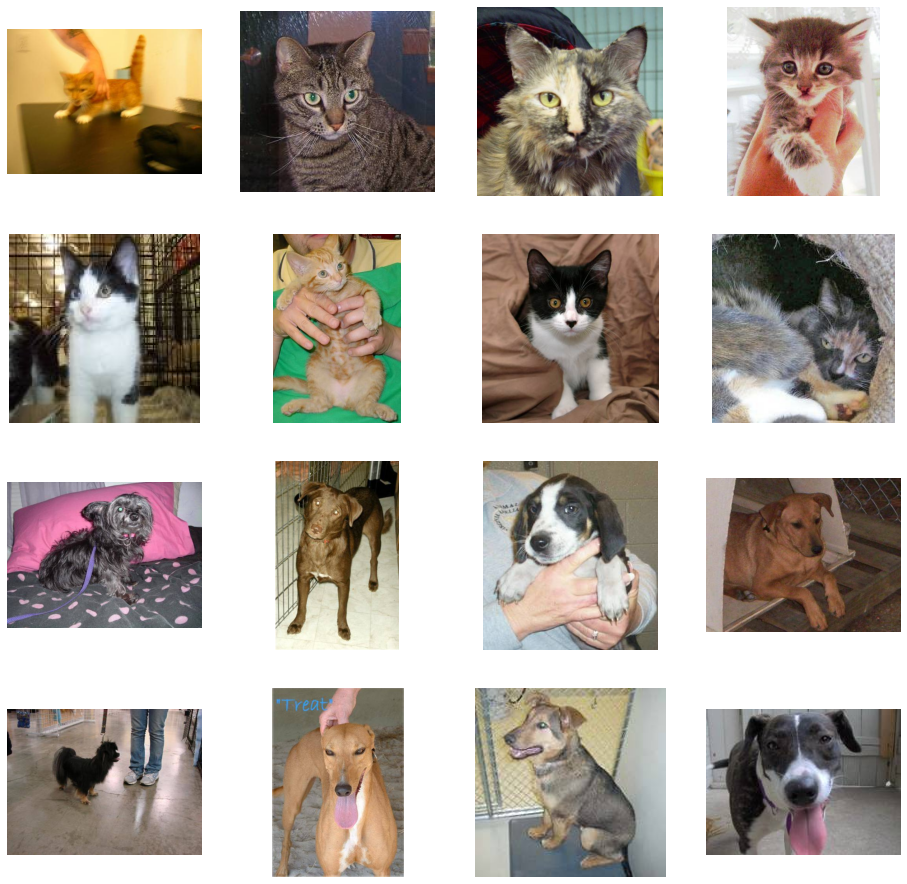

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [8]:
train_fnames = os.listdir(train_dir+'/cat')
test_fnames = os.listdir(test_dir)
print(train_fnames[:10])
print(test_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.1001.jpg', 'cat.1002.jpg', 'cat.1003.jpg', 'cat.1004.jpg', 'cat.1005.jpg']
['10000.jpg', '10001.jpg', '10002.jpg', '10003.jpg', '10004.jpg', '10005.jpg', '10006.jpg', '10007.jpg', '10008.jpg', '10009.jpg']


In [9]:
model = tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3),use_bias=True),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',use_bias=True,kernel_regularizer =tf.keras.regularizers.l2( l=0.01)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',use_bias=True,kernel_regularizer =tf.keras.regularizers.l2( l=0.01)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',use_bias=True,kernel_regularizer =tf.keras.regularizers.l2( l=0.01)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu',use_bias=True,kernel_regularizer =tf.keras.regularizers.l2( l=0.01)),
    tf.keras.layers.Dense(512, activation='relu',use_bias=True,kernel_regularizer =tf.keras.regularizers.l2( l=0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid',use_bias=True)

])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [11]:
model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [ ]:
history = model.fit_generator(train_generator,
                              epochs=100,
                              steps_per_epoch=250,
                              verbose=1,
                              validation_data=test_generator)


Epoch 1/100
 33/250 [==>...........................] - ETA: 2:49 - loss: 9.0570 - acc: 0.5121

In [ ]:
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()